# Marital Status Prediction using Logistic Regression ML Algorithm

In [112]:
#Libraries Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [113]:
df = pd.read_csv('marital status prediction.csv')

In [114]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [115]:
df.isnull().sum()

age       0
status    1
dtype: int64

In [116]:
df.shape

(20, 2)

In [117]:
#Null value handling
m_value = df['status'].median()

In [118]:
m_value

0.0

In [119]:
df.status = df.status.fillna(m_value)

In [120]:
df

,age,status
0,21,0.0
1,33,1.0
2,24,0.0
3,28,1.0
4,17,0.0
5,33,1.0
6,23,0.0
7,30,0.0
8,29,1.0
9,22,0.0


In [121]:
df.isnull().any() #No null value 

age       False
status    False
dtype: bool

In [122]:
df['status'].value_counts()

0.0    11
1.0     9
Name: status, dtype: int64

In [123]:
x = df[['age']]

In [124]:
x

,age
0,21
1,33
2,24
3,28
4,17
5,33
6,23
7,30
8,29
9,22


In [125]:
y = df['status']

In [126]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     0.0
5     1.0
6     0.0
7     0.0
8     1.0
9     0.0
10    1.0
11    0.0
12    0.0
13    0.0
14    1.0
15    1.0
16    0.0
17    0.0
18    1.0
19    1.0
Name: status, dtype: float64

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .30, random_state = 1)

In [129]:
xtrain

,age
4,17
17,18
7,30
1,33
13,24
0,21
19,25
18,26
9,22
15,29


In [130]:
xtest

,age
3,28
16,16
6,23
10,26
2,24
14,34


In [131]:
ytrain

4     0.0
17    0.0
7     0.0
1     1.0
13    0.0
0     0.0
19    1.0
18    1.0
9     0.0
15    1.0
8     1.0
12    0.0
11    0.0
5     1.0
Name: status, dtype: float64

In [132]:
ytest

3     1.0
16    0.0
6     0.0
10    1.0
2     0.0
14    1.0
Name: status, dtype: float64

In [133]:
from sklearn.linear_model import LogisticRegression

In [134]:
lg = LogisticRegression()

In [135]:
lg.fit(xtrain, ytrain)

LogisticRegression()

In [136]:
lg.predict(xtest)

array([1., 0., 0., 0., 0., 1.])

In [137]:
lg.predict([[25]])

array([0.])

In [138]:
print ('Accuracy: ', lg.score(xtest, ytest), '%')

Accuracy:  0.8333333333333334 %


In [139]:
pred = lg.predict(xtest)

In [140]:
from sklearn.metrics import accuracy_score

In [141]:
score = accuracy_score(ytest, pred)

In [142]:
score

0.8333333333333334

In [143]:
from sklearn.metrics import confusion_matrix

In [144]:
cm = confusion_matrix(ytest, pred)

In [145]:
print (cm)

[[3 0]
 [1 2]]


In [146]:
from sklearn.metrics import classification_report

In [147]:
cr = classification_report(ytest, pred)

In [148]:
print (cr)

              precision    recall  f1-score   support

         0.0       0.75      1.00      0.86         3
         1.0       1.00      0.67      0.80         3

    accuracy                           0.83         6
   macro avg       0.88      0.83      0.83         6
weighted avg       0.88      0.83      0.83         6



In [149]:
#Applying Linear Regression
from sklearn.linear_model import LinearRegression

In [150]:
lr = LinearRegression()

In [151]:
lr.fit(xtrain, ytrain)

LinearRegression()

In [152]:
lr.predict(xtest)

array([ 0.64616915, -0.2039801 ,  0.2919403 ,  0.50447761,  0.36278607,
        1.07124378])

In [153]:
sc = lr.score(xtest, ytest)

In [154]:
print ('Accuracy is: ', sc * 100, '%')

Accuracy is:  57.71565786325421 %


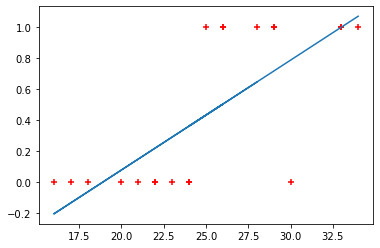

In [155]:
plt.scatter(x, y, marker = '+', color = 'red')
plt.plot(xtest, lr.predict(xtest))